# Point process discrimination according to repulsion

## Abstract
In numerous applications, cloud of points do seem to exhibit *repulsion* in the intuitive sense that there is no local cluster as in a Poisson process. Motivated by data coming from cellular networks, we devise a classification algorithm based on the form of the Voronoi cells. We show that, in the particular set of data we are given, we can retrieve some repulsiveness between antennas, which was expected for engineering reasons.

## Introduction
In the performance analysis of cellular systems, the locations of antennas (or base stations) play a major role (see {cite}`BaccelliStochasticGeometryWireless2008`). It is usually admitted that they can be modeled by a Poisson process. But the data which can be gathered from the Web site of the French National Agency of Radio Frequencies, Cartoradio, see {cite}`ANFR`, tend to prove that this may not be the case. More precisely, if we look at the global picture of all antennas in Paris, we see features reminiscent of a Poisson process (local clusters for instance), see {numref}`paris-orange-fig`(left). However, if we look closer and finer, by specifying a region and a frequency band, we see that the antennas locations do seem to exhibit some repulsion (see {numref}`paris-orange-fig`, right picture).

```{figure} /paris-orange.png
---
name: paris-orange-fig
---
Left: Antennas in Paris. Right: Antennas in one frequency  band only.

```

In previous papers, point processes with repulsion have been used to model such systems {cite}`Deng2014`, {cite}`Miyoshi2016`, {cite}`Gomez2015` for no reason but a mere resemblance between the pictures like the right picture in {numref}`paris-orange-fig` and those obtained by simulating a point process with repulsion. The question is then to decide, given one sample of positions of base stations in a bounded domain, whether it is more likely to be modeled by a point process with repulsion or by a *neutral* point process, i.e. where the locations could be considered as coming from independent drawings of some identically distributed random variables. As we only have a single realization,  we cannot use frequency methods. Since the observation window is finite, we cannot either resort to estimates based on stationarity or ergodicity and  we must take care from the side effects.

The rationale behind our work comes from {cite}`goldman_palm_2010`. It is shown there  that the Voronoi cells of the Ginibre point process (a particular point process with repulsion, see below for the exact definition) are in some sense more regular (closer to a circle) than those of a Poisson process (see {eq}`theorem_goldman` in Theorem 1.). By simulation, this feature seem to persist for other point processes with repulsion, like Gibbs processes. It is this aspect that we use to construct our classification algorithm.
We will simulate several configurations (repulsive and non-repulsive) with the same given  number of points $N$. For each configuration, we will compute the Voronoi diagrams and construct two vectors which will represent the input of our algorithm; an area vector containing the areas of the $10$ innermost Voronoi cells in order to avoid edge effects, plus $4$ other average areas from $20$ cells to have more information on the configuration. And a second perimeter vector which is constructed in the same way, containing the squared perimeters of the corresponding Voronoi cells.
The choice of areas and square perimeters as aspects to our classification task is based on the *isoperimetric inequality in $\mathbf{R}^2$ that states, for the length $P$ of a closed curve and the area $A$ of the planar region that it encloses, that
```{math}
:label: isoperimetric_inequality
P^2 \ge 4 \pi A
```
and that equality holds if and only if the curve is a circle. After normalization, we test some classical ML models (logistic regression, random forest, support vector machine, XGBoost) to classify between repulsive and neutral point processes. The results are surprisingly good even though we trained our models only on Ginibre point processes to represent the whole family of point processes with repulsion.

This paper is organized as follows. We first recall the theoretical notions that we will need in the rest of this paper. We will also briefly define the Papangelou intensity which is at the core of the definition of repulsion. In section 3 we show numerically, and based on two Machine Learning classification models, how the locations of antennas in Paris can be considered as repulsive configurations.

## Preliminaries

 A configuration on $E=\mathbf R^2$ is a locally finite (respectively finite) subset of $E$. The space of configurations (respectively finite configurations) is denoted $\mathfrak N$ (respectively $\mathfrak N_{f}$). We equip $\mathfrak N$ with the topology of vague convergence, under which it is a complete, separable, metric space. We denote by $\mathcal B(\mathfrak N)$ the Borelean $\sigma$-field on $\mathfrak N$. A locally finite (respectively finite) point process is a random variable with values in $\mathfrak N$ (respectively $\mathfrak N_{f}$).

 **Definition 1.**
 Let $\Phi$ be a locally finite point process on $E$. Its *correlation functions* $\rho^{(k)} \colon \mathfrak N_{f} \to \mathbb R_+$ are given for any measurable function $f \colon \mathfrak N_{f} \to \mathbb R_+ $ by:

$$
\mathbb{E}\left[ \sum_{\substack{\alpha \in \mathfrak N_{f} \\ \alpha \subset \Phi}} f(\alpha) \right] = \sum_{k=1}^{+ \infty} \frac{1}{k!} \int_{(E)^k} f(\{x_1, \dots, x_k\}) \rho^{(k)}(\{x_1, \dots, x_k\}) \, d x_1 \ldots d x_k .
$$

It is however easier to work with the so-called Janossy measures, whose links with correlation functions are given in {cite}`Daley2003`.

**Definition 2.**
Let $\Phi$ be a finite point process on $E$. Its *Janossy measure* $J$ is given for any $A \in \mathcal B(\mathfrak N_f)$ by:

$$
\mathbb{P}(\Phi \in A) = \sum_{k=1}^{+ \infty} \frac{1}{k!} J(A^{(k)}),
$$

where, for any $k \in \mathbb N^*, \; A^{(k)} = \{ \phi \in A,\; \phi(E) = k \}$.

**Definition 3.**
Let $\Phi$ be a finite point process on $E$. It is said to be regular if there exist *Janossy functions* $(j^{(k)}, k\ge 0)$ such that for any measurable $f \, \colon \, \mathfrak N_{f}\to \mathbb R^{+}$, we have

```{math}
:label: janossy_functions
E[ f(\Phi) ] =  \sum_{n\ge 0} \frac{1}{n!} \int_{E^n} f(\{x_1,\dots,x_n\}) \, j^{(n)}(\{x_1,\dots,x_n\}) d x_1 \ldots d x_n.
```

With this definition in hand, we can define the concept of repulsion , following {cite}`Georgii2005`.

**Definition 4.**
For $\Phi$  a finite point regular process on $E$ with Janossy functions $(j^{(k)},\, k \ge 0)$, its Papangelou intensity $c$ is given for any $x \in E$ and $\phi \in \mathfrak N_{f}$ by:

$$
c(x, \phi) = \frac{j^{(k+1)}(\{x\}\cup \phi)}{j^{(k)}(\phi)} \, \mathbf{1}_{\{j^{(k)}(\phi) \ne 0\} } \text{ if } \phi(E)=k.
$$

The quantity $c(x,\phi)$ can be intuitively thought as the probability to have a particle at $x$ given the observation $\phi$. Intuitively a point process shows repulsion when $\phi \mapsto c(x,\phi)$ is, in some sense, decreasing:

**Definition 5.**
A point process $\Phi$ on $E$ with a version $c$ of its Papangelou intensity is said to be *repulsive* if, for any $\omega, \phi \in \mathfrak N_{f}$ such that $\omega \subset \phi$ and any $x \in E$,

$$
c(x,\phi) \le c(x, \omega).
$$

With this definition, it is not hard to see that Gibbs point processes, determinantal point processes are repulsive (see {cite}`Georgii2005`, {cite}`HoughDeterminantalprocessesindependence2006`). We will not dwell into the vast literature about determinantal point processes, we only focus on the so-called Ginibre point process. It has the interesting feature that we know its distribution when restricted to a compact ball in $E$. For reasons which will be self-evident, we identify hereafter $\mathbb R^{2}$ and $\mathbb C$.

**Definition 6.**
The *Ginibre point process* with intensity $\rho = \frac{\lambda}{\pi}$ (with $\lambda > 0$) is a locally finite point process on $\mathbb C$ that can be defined by its correlation functions:

```{math}
:label: correlation_functions_determinantal
\rho^{(k)}(x_1, \dots, x_k) = \det(K(x_i, x_j), \; 1\le i,j \le k)
```
where $K$ is given by:

$$
K(x,y) = \rho \, e^{-\frac{\lambda}{2}(|x|^2 + |y|^2)}e^{\lambda x \bar{y}},\ \forall \, (x,y) \in \mathbb C^2.
$$

When restricted to the $B(0,R)$, the Ginibre point process admits correlation functions of the form {eq}`correlation_functions_determinantal` with $K=K_R$ given by:

```{math}
:label: eq_main:1
K_R(x,y)=\sum_{j=1}^{+\infty} \frac{\gamma(j+1,R^2)}{j!} \phi_j(x)\phi_j(\bar y)
```
with

$$
\phi_j(x)=\sqrt{\frac{\rho}{\gamma(j+1,R^2)}} \left(\sqrt{\lambda}x\right)^j\, e^{-\frac{\lambda}{2} |x|^2},
$$

and $\gamma(n,x)$ is the lower incomplete Gamma function.

The simulation of such a point process is a delicate matter, first solved in {cite}`HoughDeterminantalprocessesindependence2006`. It remains costly because the algorithm contains complex calculations and some rejections. In order to fasten the procedure, an approximate algorithm has been given in {cite}`MR4279876` (see the bibliography therein to get the URL of the Python code).

For an at most denumerable set of points $\{x_{n}, \, n\ge 1\}$, the Voronoi cells are defined as the convex sets

$$
\mathcal{C}(x_{i})=\{z\in \mathbb C,\ |z-x_{i}|\le |z-x_{j}|  \text{ for all }j\neq i\}.
$$

When the points are drawn from a point process, we thus have a collection of random closed sets. When the process under consideration is stationary with respect to translations, it is customary to define the typical law of a Voronoi cell as the law of the cell containing the origin of $\mathbb R^{2}$ when the point process is taken under its Palm distribution {cite}`goldman_palm_2010`, {cite}`BaccelliStochasticGeometryWireless2009`. It turns out that we know the Palm distribution of the Poisson process (which is itself) and of the Ginibre point process (the correlation functions are of the form {eq}`correlation_functions_determinantal` with $K$ being $K_{R}$ with the first term removed).
We denote by $\mathcal{C}_p$ (respectively $C_{G}$) the typical cell of the Voronoi tessellation associated to a stationary Poisson process in $\mathbb C$ with intensity $\lambda$ (respectively to the Ginibre point process of intensity $\rho$). One of the main theorems of {cite}`goldman_palm_2010` is the following.

**Theorem 1.**
When $r \to 0,$
```{math}
:label: theorem_goldman
\mathbb{E} \left[ V(\mathcal{C}_{G} \cap B(0,r)) \right] = \mathbb{E} \left[ V(\mathcal{C}_p \cap B(0,r)) \right] (1 + r^2 W + \circ(r^2))
```
where $W$ is a positive random variable.

This theorem shows that near the germs of the cells a more important part of the area is captured in the Ginibre–Voronoi tessellation than in the Poisson–Voronoi tessellation. This is an indication that the Voronoi cells of the Ginibre point process are more circular than those given by the Poisson process. This can be corroborated by simulation as shows the {numref}`voronoi-fig`

```{figure} /Voronoi.png
---
name: voronoi-fig
---
On the left, Voronoi associated to a realization of a Poisson process. On the right, Voronoi cells associated to a realization of a Ginibre point process.
```

As we know that circles saturate the isoperimetric inequality, it is sensible to consider classification algorithms based on area and squared perimeter of Voronoi cells. In order to avoid side effects, we concentrate on the innermost cells of the observation window.

## Classification of CARTORADIO data

The Cartoradio web site contains the locations (in GPS coordinates) and other informations about all the antennas (or base stations) in metropolitan France for any operator, any frequency band and all generation of wireless systems (2G to 5G). The capacity of an antenna depends on its power and on the traffic demand it has to serve.  Outside metropolitan areas, the antennas are relatively scarce and located along the main roads to guarantee a large surface coverage (around 30 km$^2$). Hence there is no need to  construct models for these regions.  On the contrary, in big towns, the density of base stations is much higher to handle the traffic demand: An antenna covers around half a squared kilometer. This is  where the dimensioning problem do appear. One should have a sufficient number of antennas per unit of surface to transport all the traffic, on the other hand, base stations operating in a given frequency band cannot be to close to mitigate interference. This explains the right picture of Figure {numref}`paris-orange-fig`.

When it comes to assess the type of point process we should consider in this situation, we cannot consider the city as a whole: the geography (notably the Seine river in Paris, the parks, etc.), the non uniformity of demands (the traffic is heavier aroung railway stations or touristic sites,  for instance) which entails a higher density of antennas,  ruin any kind of invariance a statistician  could hope for. That means, we should restrict our expectations to local models of  the size of a district or a bit more. Since interference, which are the main annoyance to be dealt with, are a local phenomenon, working on a partial part of the whole domain is sufficient to predict the behavior and dimension a wireless network. 


### Model training

Given a circular domain with $N$ points, we want to decide whether the points suffer from repulsion or not. Since the repulsion is not sensitive to scaling, we normalize the radius to $R=\sqrt{N}$. This is due to the fact that a cloud drawn from a  Ginibre point process of intensity $1$  with $N$ occupies roughly a disk with this radius. We train our models on datas issued from drawings of Ginibre configuration and from drawings of $N$ points independently and uniformly scattered in $B(0,\sqrt{N})$.

For each of the previous samples, we compute the Voronoi diagrams and retain only the $10$ cells which are the closest to the barycenter of the configuration in order to avoid side effects. We then  extract the areas and the perimeters  of these cells. In addition to that, we compute the mean of the first $5$, $10$, $15$ and $20$ cells' areas in order to have a more global information.

The final data will be a set of observations where each one contains $29$ columns described as follow:
- For $1 \le i \le 10, \; \mathrm{V}_i$ is the area of the $i^{\mathrm{th}}$ Voronoi cell.
- For $1 \le j \le 10, \; \mathrm{P}_j$ is the square perimeter of the $j^{\mathrm{th}}$ Voronoi cell.
- For $k \in \{5, 10, 15, 20\}, \; \mathrm{MV}_{k}$ (respectively $\mathrm{MP}_{k}$) is the average area (respectively square perimeter) of the first $k$ Voronoi cells.
- A binary column that represent the type of the initial configuration ($1$ for repulsive/Ginibre - $0$ for non-repulsive/Poisson).

The final column will be the target variable for our classification models.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import Delaunay, Voronoi, ConvexHull

font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 11,}

# Useful functions for creating the data:

def convert_complex_points(l):
    return l.real, l.imag

def convert_lists_to_points(l1, l2):
    return np.array([l1, l2]).T

def extract_Voronoi_areas(vor):  
    areas= []
    perim = []
    for i in range(len(vor.filtered_regions)):
        areas.append(round(ConvexHull(vor.vertices[vor.filtered_regions[i], :]).volume, 2))
        perim.append(round(ConvexHull(vor.vertices[vor.filtered_regions[i], :]).area, 2))
    return areas, list(np.around((np.array(perim))**2, 2))

def in_box(towers, bounding_box):
    return np.logical_and(np.logical_and(bounding_box[0] <= towers[:, 0], towers[:, 0] <= bounding_box[1]),
                          np.logical_and(bounding_box[2] <= towers[:, 1], towers[:, 1] <= bounding_box[3]))


def voronoi(towers, bounding_box, N):
    # Select towers inside the bounding box
    i = in_box(towers, bounding_box)
    # Mirror points
    points_center = towers[i, :]
    points_left = np.copy(points_center)
    points_left[:, 0] = bounding_box[0] - (points_left[:, 0] - bounding_box[0])
    points_right = np.copy(points_center)
    points_right[:, 0] = bounding_box[1] + (bounding_box[1] - points_right[:, 0])
    points_down = np.copy(points_center)
    points_down[:, 1] = bounding_box[2] - (points_down[:, 1] - bounding_box[2])
    points_up = np.copy(points_center)
    points_up[:, 1] = bounding_box[3] + (bounding_box[3] - points_up[:, 1])
    points = np.append(points_center,
                       np.append(np.append(points_left, points_right, axis=0),
                                 np.append(points_down, points_up, axis=0),
                                 axis=0),
                       axis=0)
    # Compute Voronoi
    vor = Voronoi(points)
    # Filter regions
    # regions = []
    # [vor.point_region[i] for i in range(N)]

    vor.filtered_points = points_center
    vor.filtered_regions = [vor.regions[vor.point_region[i]] for i in range(len(points_center))]
    return vor

def dpp_Moroz(N):
    radius = int(np.sqrt(N)) ; precision = 2**-53 ; error = False ; quiet=True ; output=None 
    args = [radius, N, kernels['ginibre'], precision, error, quiet, output]
    
    moroz_dpp = sample(*args)
    X_dpp_Mz, Y_dpp_Mz = convert_complex_points(moroz_dpp)
    X_dpp_Mz = X_dpp_Mz*((np.sqrt(N))/radius) ; Y_dpp_Mz = Y_dpp_Mz*((np.sqrt(N))/radius)
    dpp_Mz_points = convert_lists_to_points(X_dpp_Mz, Y_dpp_Mz)
    
    indices = np.argsort((dpp_Mz_points[:,0])**2 + ((dpp_Mz_points[:,1])**2))
    dpp_Mz_points = dpp_Mz_points[indices]
    
    dpp_Mz_vor = voronoi(dpp_Mz_points, (-np.sqrt(N)-.1, np.sqrt(N)+.1, -np.sqrt(N)-.1, np.sqrt(N)+.1), len(dpp_Mz_points))
    Voronoi_areas, Voronoi_perim = extract_Voronoi_areas(dpp_Mz_vor)
    
    return [Voronoi_areas, Voronoi_perim, 1]

def random_process(N):
    radius = np.sqrt(N)
    alpha = 2*np.pi*scipy.stats.uniform.rvs(0,1,N)
    r = radius*np.sqrt(scipy.stats.uniform.rvs(0,1,N))
    
    X_rand, Y_rand = r*np.cos(alpha), r*np.sin(alpha)
    rand_points = convert_lists_to_points(X_rand, Y_rand)
    
    indices = np.argsort((rand_points[:,0])**2 + ((rand_points[:,1])**2))
    rand_points = rand_points[indices]
    
    rand_vor = voronoi(rand_points, (-radius -.1, radius +.1, -radius -.1, radius +.1), len(rand_points))
    Voronoi_areas, Voronoi_perim = extract_Voronoi_areas(rand_vor)
    
    return [Voronoi_areas, Voronoi_perim, 0]

def create_dataframe(N, observations):
    list_df = []
    for i in range(observations):
        list_df.append(dpp_Moroz(N))
        list_df.append(random_process(N))
    df = pd.DataFrame(list_df, columns =['Voronoi_areas', 'Voronoi_perim', 'Type'])
    return df

def normalize(vec):
    vec = np.array(vec)
    m, e = np.mean(vec), np.sqrt(np.var(vec))
    return (vec - m)/e

def compute_mean(l, n):
    if n <= len(l):
        new_l = np.array(list(list(zip(*l))[:n])).T
    else:
        new_l = np.array(list(list(zip(*l))[:len(l)])).T

    return np.mean(new_l, axis=1)

def single_area(l, k):
    l = np.array(l)
    return l[:,k]

def transform_df(odf):
    
    list_V = odf['Voronoi_areas'].tolist()
    list_P = odf['Voronoi_perim'].tolist()
    
    [MV5, MV10, MV15, MV20] = [compute_mean(list_V, n) for n in [5, 10, 15, 20]]
    [MP5, MP10, MP15, MP20] = [compute_mean(list_P, n) for n in [5, 10, 15, 20]]
    
    normalized_V10 = [normalize(list_V[i][:10]) for i in range(odf.shape[0])]
    normalized_P10 = [normalize(list_P[i][:10]) for i in range(odf.shape[0])]
    
    [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10] = [single_area(normalized_V10, k) for k in range(10)]
    [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10] = [single_area(normalized_P10, k) for k in range(10)]
    
    dict_df = {'V1':V1, 'V2':V2, 'V3':V3, 'V4':V4, 'V5':V5, 'V6':V6, 'V7':V7, 'V8':V8, 'V9':V9, 'V10':V10,
               'MV5':MV5, 'MV10':MV10, 'MV15':MV15, 'MV20':MV20,
               'P1':P1, 'P2':P2, 'P3':P3, 'P4':P4, 'P5':P5, 'P6':P6, 'P7':P7, 'P8':P8, 'P9':P9, 'P10':P10,
               'MP5':MP5, 'MP10':MP10, 'MP15':MP15, 'MP20':MP20,
               'type': odf['Type']}
    
    return pd.DataFrame(dict_df)

%run -i Moroz_dpp.py

Importing libraries ...
Compiling functions ...


Here is an example of the data created. We generate a data of $2000$ observations of configurations ($1000$ repulsive and $1000$ non repulsive) of $N = 24$ points.

In [2]:
ddf = create_dataframe(24, 1000)
ddf_transformed = transform_df(ddf)
ddf_transformed.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,P6,P7,P8,P9,P10,MP5,MP10,MP15,MP20,type
0,0.619069,2.118513,-1.108361,0.233247,-0.319180,0.531382,-1.283734,-0.555934,-0.976831,0.741830,...,0.642109,-1.235852,-0.675837,-0.252643,1.750048,66.454,67.170,74.922667,78.9670,1
1,1.292991,-0.275957,-1.689123,-0.988104,1.409828,0.174698,0.953609,0.614227,-0.698794,-0.793376,...,0.090328,1.102508,-0.030435,-0.799692,-0.767581,84.372,82.052,81.070000,79.7435,0
2,1.122631,0.718807,0.099610,-0.429848,-0.824698,-0.995202,0.036793,-1.282365,-0.546508,2.100782,...,-0.744180,-0.344262,-0.911651,-0.293982,2.774634,71.216,73.701,81.078667,77.4005,1
3,0.563968,0.499391,0.843799,1.371174,-1.610107,1.198970,-1.082732,0.015068,-0.802901,-0.996630,...,1.511378,-1.133891,0.095374,-0.794211,-0.935697,42.164,37.775,62.443333,73.2350,0
4,0.292129,0.272567,1.289801,0.755101,-0.014346,-0.236051,1.544110,-1.461949,-1.377179,-1.064184,...,-0.267438,1.484237,-1.437454,-1.388796,-1.104439,80.720,68.561,73.035333,69.4115,1


### Classification models

In this section, we will train and test some Machine Learning models using the data we've created in the previous section. For a start we will select all the columns as inputs to our models (this can lead to false predictions, especially if some columns share the same information). And also we will only use baseline models, i.e. all the hyperparameters' values are taken as defaults, (a grid search can be used later in order to select the optimal hyperparameters for each model).

The models we use in this paper are:
- Logistic regression, which is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a $0$ or $1$.
- Random forest, a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the accuracy and control over-fitting.

Two other classification models (Support Vector Machine and XGBoost) have been tested but not introduced in this paper since they gave similar results to the models prensent in this paper.

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Useful function for evaluating our models:

def model_Evaluate(model, x_tt, y_tt):
    y_pred = model.predict(x_tt)
    print(classification_report(y_tt, y_pred))
    
    cf_matrix = confusion_matrix(y_tt, y_pred)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    logit_roc_auc = roc_auc_score(y_tt, model.predict(x_tt))
    fpr, tpr, thresholds = roc_curve(y_tt, model.predict_proba(x_tt)[:,1])
    
    fig = plt.figure(figsize=(12, 5))
    # Adds subplot on position 1
    ax = fig.add_subplot(121)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
    ax.set_title("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    ax.set(xlabel='Predicted values', ylabel='Actual values')

    # Adds subplot on position 2
    ax = fig.add_subplot(122)
    ax.plot(fpr, tpr, label='area = %0.2f' % logit_roc_auc)
    ax.plot([0, 1], [0, 1],'r--', label='Standard')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([0.0, 1.05])
    
    thresholds_rounded = [round(num, 1) for num in thresholds]
    for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        if threshold in thresholds_rounded:
            index = thresholds_rounded.index(threshold)
            ax.annotate(threshold, (fpr[index], tpr[index]))

    ax.set_title('Receiver Operating Characteristic (ROC)')
    ax.set(xlabel='False Positive Rate (1-specificity)', ylabel='True Positive Rate (sensitivity)')
    ax.legend(loc="lower right")
    ax.grid()
    plt.show()


model_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'MV5', 'MV10', 'MV15', 'MV20',
             'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'MP5', 'MP10', 'MP15', 'MP20']
X = ddf_transformed[model_cols].values
y = ddf_transformed['type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle= True, random_state=7)

Here are the results of the logistic regression

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       298
           1       0.86      0.87      0.86       302

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



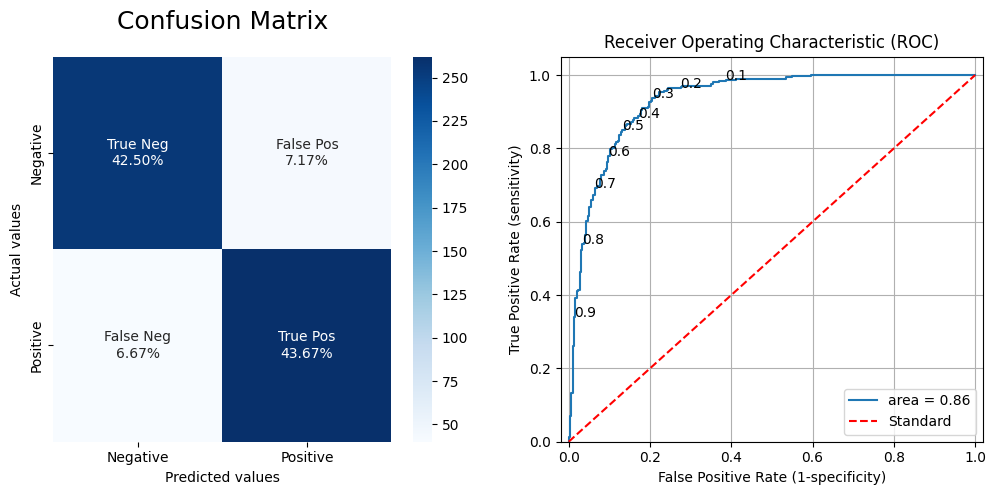

In [4]:
Baseline_LR = make_pipeline(StandardScaler(), LogisticRegression())
Baseline_LR.fit(X_train, y_train)
model_Evaluate(Baseline_LR, X_test, y_test)

Here are the results of the random forest

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       298
           1       0.88      0.88      0.88       302

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



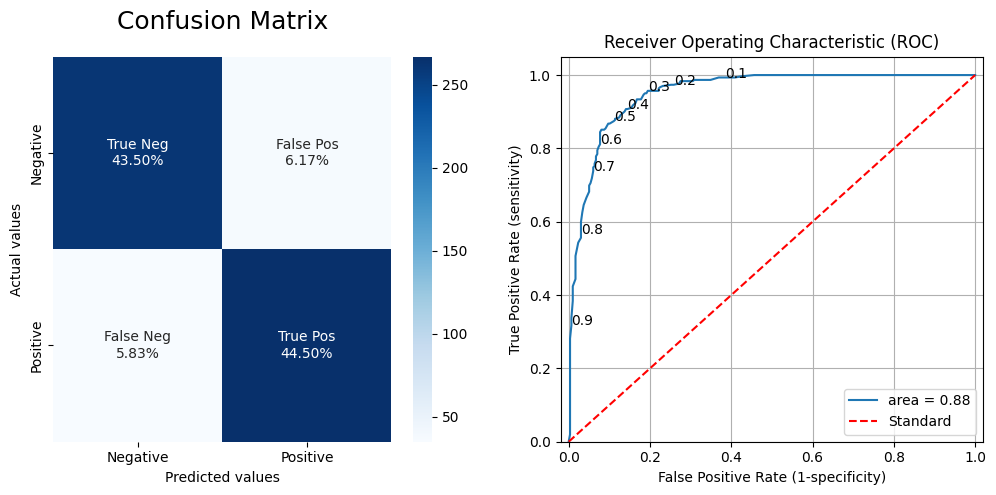

In [5]:
baseline_RF = RandomForestClassifier()
baseline_RF.fit(X_train,y_train)
model_Evaluate(baseline_RF, X_test, y_test)

### Testing on CARTORADIO data

CARTORADIO data is a set of configurations of some mobile phone base stations in Paris. The goal is to decide from the classification models already used, the repulsion of these configurations.

The initial data (positions of the mobile phone antennas) covered a large area of the city of Paris (see {numref}`cartoradio-fig`(right)), while the prediction models were trained on simulated data on small circles compared with the initial CARTORADIO data.
In addition to that, we are working with a real dataset, so we often encounter the problem of heterogeneity between the different configurations since they depend on the structure of the space in which the antennas are placed.

So to remedy this problem, we will extract from each configuration a representative sample similar to the type of training data so that the tests make sense. {numref}`cartoradio-fig` (left) shows a sample extracted from a given configuration.

```{figure} /cartoradio.png
---
name: cartoradio-fig
---
On the left, Initial cartoradio configuration. On the right, Sample extracted from it and scaled.
```

In the following, we will read the CARTORADIA directly from the "data_cartoradio.csv" file.

In [6]:
# Useful functions to transform the CARTORADIO data

def update_df(odf): 
    converted_V = odf['Voronoi_areas'].str[1:-1].str.split(',').tolist()
    converted_P = odf['Voronoi_perim'].str[1:-1].str.split(',').tolist()
    
    list_V = [(np.float_(converted_V[i])).tolist() for i in range(odf.shape[0])]
    list_P = [(np.float_(converted_P[i])).tolist() for i in range(odf.shape[0])]
    
    list_N = [len(list_V[i]) for i in range(odf.shape[0])]
    
    [MV5, MV10, MV15, MV20] = [compute_mean(list_V, n) for n in [5, 10, 15, 20]]
    [MP5, MP10, MP15, MP20] = [compute_mean(list_P, n) for n in [5, 10, 15, 20]]
    
    normalized_V10 = [normalize(list_V[i][:10]) for i in range(odf.shape[0])]
    normalized_P10 = [normalize(list_P[i][:10]) for i in range(odf.shape[0])]
    
    [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10] = [single_area(normalized_V10, k) for k in range(10)]
    [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10] = [single_area(normalized_P10, k) for k in range(10)]
    
    dict_df = {'V1':V1, 'V2':V2, 'V3':V3, 'V4':V4, 'V5':V5, 'V6':V6, 'V7':V7, 'V8':V8, 'V9':V9, 'V10':V10,
               'MV5':MV5, 'MV10':MV10, 'MV15':MV15, 'MV20':MV20,
               'P1':P1, 'P2':P2, 'P3':P3, 'P4':P4, 'P5':P5, 'P6':P6, 'P7':P7, 'P8':P8, 'P9':P9, 'P10':P10,
               'MP5':MP5, 'MP10':MP10, 'MP15':MP15, 'MP20':MP20}
    
    return list_N, pd.DataFrame(dict_df)

def models_input(N):
    data0 = create_dataframe(N, observations = 1000)
    data1 = transform_df(data0)
    
    model_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'MV5', 'MV10', 'MV15', 'MV20',
                  'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'MP5', 'MP10', 'MP15', 'MP20']

    X = data1[model_cols].values
    y = data1['type'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=7)
    
    return X_train, X_test, y_train, y_test

In [7]:
data = pd.read_csv('data_voronoi_cartoradio.csv', sep=',')
list_N, data_test = update_df(data)
print(list_N)
data_test.head()

[31, 23, 22, 24, 22, 46, 24, 31, 29, 22]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,P5,P6,P7,P8,P9,P10,MP5,MP10,MP15,MP20
0,1.058615,-1.059609,-0.322889,-0.837226,-0.608632,-0.546514,0.057273,-0.332828,0.110694,2.481117,...,-0.313571,-0.390272,-0.272901,-0.510596,0.075056,2.841118,54.9306,60.7143,60.7143,60.7143
1,-0.297282,-0.299891,-0.052026,-0.948517,-0.221096,-0.493487,-0.628118,2.228860,1.582844,-0.871287,...,-0.219659,-0.564626,-0.639599,2.209631,1.647841,-0.900765,57.9418,69.9330,69.9330,69.9330
2,-0.315399,-0.524015,-1.064477,-0.154813,-0.756404,-0.778721,-0.056812,1.792111,2.012857,-0.154328,...,-0.808625,-0.304950,-0.290136,2.051852,1.790089,0.068707,53.5506,80.4082,80.4082,80.4082
3,-0.035014,-0.192421,-0.538841,0.176928,-0.759460,-0.958388,-0.734051,-0.177548,2.703503,0.515292,...,-0.827160,-0.875832,-0.594335,0.029275,2.580715,1.019987,61.9572,78.8108,78.8108,78.8108
4,1.320579,-0.068657,0.890645,-1.103718,-1.511872,1.745779,0.231539,-0.269419,-0.711664,-0.523213,...,-1.648871,2.167209,0.013477,-0.391777,-0.368717,-0.440355,68.3258,71.4361,71.4361,71.4361


Now that the data is read and transformed, we regroup the observations by the number of points $N$ and then create the models inputs for each value of $N$ using the function *models_input(N)*, but since this task takes so much time to be executed that we got the time-out error. That's why we already prepared, for each value of $N$, a file containing the data created locally, and we will read the files directly.

#### N = 31

In [8]:
data31 = pd.read_csv('data_31.csv', sep=',')
X31 = data31[model_cols].values
y31 = data31['type'].values
X31_train, X31_test, y31_train, y31_test = train_test_split(X31, y31, test_size=0.3, shuffle=True, random_state=7)
data_test_31 = data_test.iloc[[0, 7]]

print('N = 31')
print('------------------')
print('Logistic Regression Results')
Baseline_LR.fit(X31_train, y31_train)
print(Baseline_LR.predict(data_test_31.values)[0], Baseline_LR.predict_proba(data_test_31.values)[0])
print(Baseline_LR.predict(data_test_31.values)[1], Baseline_LR.predict_proba(data_test_31.values)[1])
print('------------------')
print('Random Forest Results')
baseline_RF.fit(X31_train, y31_train)
print(baseline_RF.predict(data_test_31.values)[0], baseline_RF.predict_proba(data_test_31.values)[0])
print(baseline_RF.predict(data_test_31.values)[1], baseline_RF.predict_proba(data_test_31.values)[1])

N = 31
------------------
Logistic Regression Results
0 [0.64423014 0.35576986]
1 [0.08019266 0.91980734]
------------------
Random Forest Results


0 [0.74 0.26]
1 [0.21 0.79]


#### N = 23

In [9]:
data23 = pd.read_csv('data_23.csv', sep=',')
X23 = data23[model_cols].values
y23 = data23['type'].values
X23_train, X23_test, y23_train, y23_test = train_test_split(X23, y23, test_size=0.3, shuffle=True, random_state=7)
data_test_23 = data_test.iloc[[1]]

print('N = 23')
print('------------------')
print('Logistic Regression Results')
Baseline_LR.fit(X23_train, y23_train)
print(Baseline_LR.predict(data_test_23.values)[0], Baseline_LR.predict_proba(data_test_23.values)[0])
print('------------------')
print('Random Forest Results')
baseline_RF.fit(X23_train, y23_train)
print(baseline_RF.predict(data_test_23.values)[0], baseline_RF.predict_proba(data_test_23.values)[0])

N = 23
------------------
Logistic Regression Results
1 [0.06596102 0.93403898]
------------------
Random Forest Results


0 [0.52 0.48]


#### N = 22

In [10]:
data22 = pd.read_csv('data_22.csv', sep=',')
X22 = data22[model_cols].values
y22 = data22['type'].values
X22_train, X22_test, y22_train, y22_test = train_test_split(X22, y22, test_size=0.3, shuffle=True, random_state=7)
data_test_22 = data_test.iloc[[2, 4, 9]]

print('N = 22')
print('------------------')
print('Logistic Regression Results')
Baseline_LR.fit(X22_train, y22_train)
print(Baseline_LR.predict(data_test_22.values)[0], Baseline_LR.predict_proba(data_test_22.values)[0])
print(Baseline_LR.predict(data_test_22.values)[1], Baseline_LR.predict_proba(data_test_22.values)[1])
print(Baseline_LR.predict(data_test_22.values)[2], Baseline_LR.predict_proba(data_test_22.values)[2])
print('------------------')
print('Random Forest Results')
baseline_RF.fit(X22_train, y22_train)
print(baseline_RF.predict(data_test_22.values)[0], baseline_RF.predict_proba(data_test_22.values)[0])
print(baseline_RF.predict(data_test_22.values)[1], baseline_RF.predict_proba(data_test_22.values)[1])
print(baseline_RF.predict(data_test_22.values)[2], baseline_RF.predict_proba(data_test_22.values)[2])

N = 22
------------------
Logistic Regression Results
1 [0.18127125 0.81872875]
1 [0.01796698 0.98203302]
1 [0.02466654 0.97533346]
------------------
Random Forest Results


0 [0.78 0.22]
1 [0.12 0.88]
0 [0.6 0.4]


#### N = 24

In [11]:
data24 = pd.read_csv('data_24.csv', sep=',')
X24 = data24[model_cols].values
y24 = data24['type'].values
X24_train, X24_test, y24_train, y24_test = train_test_split(X24, y24, test_size=0.3, shuffle=True, random_state=7)
data_test_24 = data_test.iloc[[3, 6]]

print('N = 24')
print('------------------')
print('Logistic Regression Results')
Baseline_LR.fit(X24_train, y24_train)
print(Baseline_LR.predict(data_test_24.values)[0], Baseline_LR.predict_proba(data_test_24.values)[0])
print(Baseline_LR.predict(data_test_24.values)[1], Baseline_LR.predict_proba(data_test_24.values)[1])
print('------------------')
print('Random Forest Results')
baseline_RF.fit(X24_train, y24_train)
print(baseline_RF.predict(data_test_24.values)[0], baseline_RF.predict_proba(data_test_24.values)[0])
print(baseline_RF.predict(data_test_24.values)[1], baseline_RF.predict_proba(data_test_24.values)[1])

N = 24
------------------
Logistic Regression Results
1 [0.44707948 0.55292052]
1 [0.44709033 0.55290967]
------------------
Random Forest Results


1 [0.37 0.63]
1 [0.25 0.75]


#### N = 46

In [12]:
data46 = pd.read_csv('data_46.csv', sep=',')
X46 = data46[model_cols].values
y46 = data46['type'].values
X46_train, X46_test, y46_train, y46_test = train_test_split(X46, y46, test_size=0.3, shuffle=True, random_state=7)
data_test_46 = data_test.iloc[[5]]

print('N = 46')
print('------------------')
print('Logistic Regression Results')
Baseline_LR.fit(X46_train, y46_train)
print(Baseline_LR.predict(data_test_46.values)[0], Baseline_LR.predict_proba(data_test_46.values)[0])
print('------------------')
print('Random Forest Results')
baseline_RF.fit(X46_train, y46_train)
print(baseline_RF.predict(data_test_46.values)[0], baseline_RF.predict_proba(data_test_46.values)[0])

N = 46
------------------
Logistic Regression Results
1 [0.45965142 0.54034858]
------------------
Random Forest Results


1 [0.39 0.61]


#### N = 29

In [13]:
data29 = pd.read_csv('data_29.csv', sep=',')
X29 = data29[model_cols].values
y29 = data29['type'].values
X29_train, X29_test, y29_train, y29_test = train_test_split(X29, y29, test_size=0.3, shuffle=True, random_state=7)
data_test_29 = data_test.iloc[[8]]

print('N = 29')
print('------------------')
print('Logistic Regression Results')
Baseline_LR.fit(X29_train, y29_train)
print(Baseline_LR.predict(data_test_29.values)[0], Baseline_LR.predict_proba(data_test_29.values)[0])
print('------------------')
print('Random Forest Results')
baseline_RF.fit(X29_train, y29_train)
print(baseline_RF.predict(data_test_29.values)[0], baseline_RF.predict_proba(data_test_29.values)[0])

N = 29
------------------
Logistic Regression Results
1 [0.0175506 0.9824494]
------------------
Random Forest Results


1 [0.24 0.76]


We can notice that the classification results are mostly positive, which means that the majority of the samples taken from the CARTORADIO data can be decided as repulsive configurations which is consistent with our starting hypothesis. For the configurations whose results were as non-repulsive, we can say that this is due to one of the two following reasons:
- As long as we are dealing with real data, these two samples may be a non-repulsive ones and the results are actually coherent.
- It is sure that the accuracy of our models is very high, but we may have some classification errors, which means that even if the configuration is repulsive, the model decides that it is not.

## Conclusion

In this paper it has been shown numerically (based on the theoretical results in {cite}`goldman_palm_2010`) that Voronoi cells represent an effective means for determining the nature of repulsion of a configuration (repulsive or not), and this by creating a database of various configurations and extracting the areas and perimeters of the Voronoi cells in order to use them as input to the classification models described earlier.

Once the models are trained and tested on the data created, they are tested after that on real data, which are the positions of a mobile phone base stations in PARIS. Visually, we can easily say that these configurations are repulsive, which we have confirmed for the majority of these configurations by testing them by the previously trained models.

```{bibliography}
:style: unsrt
```